In [3]:
df = df[['comments']]
df.head()


,comments
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [7]:
df = df.dropna(subset=['comments'])


In [9]:
df.count()

comments    132
dtype: int64

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

In [14]:
df.to_excel('cleaned_comments.xlsx', index=False)

In [16]:
df = pd.read_excel('cleaned_comments.xlsx')

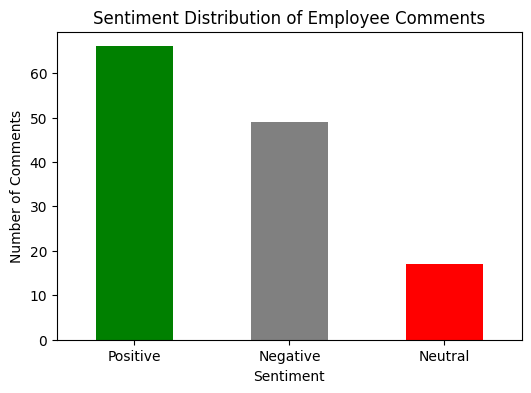

                                            comments Sentiment
0  I'm not on my company's health insurance which...  Positive
1  I have chronic low-level neurological issues t...  Positive
2  My company does provide healthcare but not to ...   Neutral
3                Relatively new job. Ask again later   Neutral
4  Sometimes I think  about using drugs for my me...  Positive


In [18]:


# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(comment):
    vader_score = analyzer.polarity_scores(comment)["compound"]  # VADER score
    blob_score = TextBlob(comment).sentiment.polarity  # TextBlob score
    
    # Average both scores
    final_score = (vader_score + blob_score) / 2
    
    # Categorize into Positive, Neutral, Negative
    if final_score > 0.05:
        return "Positive"
    elif final_score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply function to comments
df["Sentiment"] = df["comments"].apply(get_sentiment)

# Count sentiment distribution
sentiment_counts = df["Sentiment"].value_counts()

# Visualize results
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Sentiment Distribution of Employee Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

# Save results
df.to_csv("sentiment_analysis_results.csv", index=False)

print(df.head())  # Check output

In [19]:
df

,comments,Sentiment
0,I'm not on my company's health insurance which...,Positive
1,I have chronic low-level neurological issues t...,Positive
2,My company does provide healthcare but not to ...,Neutral
3,Relatively new job. Ask again later,Neutral
4,Sometimes I think about using drugs for my me...,Positive
...,...,...
127,While mental health is a part of our insurance...,Negative
128,My work is using my brain. I do it incredibly ...,Positive
129,My employer is extremely easy to work with and...,Positive
130,The questions related to employer-provided hea...,Positive


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load the dataset with sentiment analysis results
df = pd.read_csv("sentiment_analysis_results.csv")

# Filter only negative comments
negative_comments = df[df["Sentiment"] == "Negative"]["comments"]

# Convert to a list
negative_comments_list = negative_comments.tolist()

# TF-IDF Vectorizer to extract important words
vectorizer = TfidfVectorizer(stop_words="english", max_features=20)
tfidf_matrix = vectorizer.fit_transform(negative_comments_list)

# Get feature names (keywords)
keywords = vectorizer.get_feature_names_out()
keyword_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Sort keywords by importance
sorted_keywords = sorted(zip(keywords, keyword_scores), key=lambda x: x[1], reverse=True)

# Display top keywords
print("Top keywords in negative comments:")
for word, score in sorted_keywords:
    print(f"{word}: {score:.2f}")



Top keywords in negative comments:
health: 8.31
mental: 7.92
small: 5.88
don: 5.39
depression: 5.04
people: 4.81
family: 4.73
issues: 4.07
employer: 4.06
questions: 3.69
anxiety: 3.61
work: 3.60
know: 3.50
ve: 3.36
issue: 2.68
leave: 2.37
say: 2.25
insurance: 2.20
treatment: 1.86
coworkers: 1.56


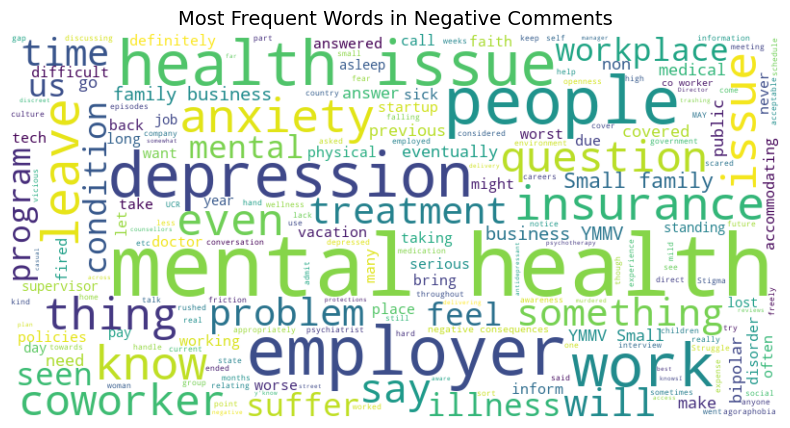

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all negative comments into one text block
negative_text = " ".join(negative_comments_list)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Comments", fontsize=14)
plt.show()


In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample Data
comments = [
    "My employer does not take mental health seriously.",
    "Workplace stress is a major issue for me.",
    "The company provides excellent wellness programs.",
    "I feel supported when I discuss mental health with my supervisor.",
    "Workload is too high and affects my well-being."
]

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Display Topics
words = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx+1}: {', '.join(words[np.argsort(topic)[-5:]])}")


Topic 1: supervisor, feel, supported, mental, health
Topic 2: workload, workplace, major, issue, stress


In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample dataset (Replace this with your actual dataset)
data = pd.read_excel('cleaned_comments.xlsx')

df = pd.DataFrame(data)

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["comments"])

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)
topic_distribution = lda.transform(X)

# Assign the dominant topic to each comment
df["Dominant_Topic"] = np.argmax(topic_distribution, axis=1)

# Label topics
topic_labels = {
    0: "Employer Support & Mental Health",
    1: "Workplace Stress & Workload Issues"
}

df["Topic_Label"] = df["Dominant_Topic"].map(topic_labels)

# Sort by "Workplace Stress & Workload Issues"
stressed_employees = df[df["Topic_Label"] == "Workplace Stress & Workload Issues"]

# Display top affected employees
print(stressed_employees)


                                              comments  Dominant_Topic  \
0    I'm not on my company's health insurance which...               1   
3                  Relatively new job. Ask again later               1   
5    I selected my current employer based on its po...               1   
6    Our health plan has covered my psychotherapy a...               1   
10   In Russia we have mandatory medical insurance....               1   
..                                                 ...             ...   
121  I have an exceptional employer. I haven't run ...               1   
123  Though I'm in the Netherlands and chose that c...               1   
124  I am a Trans woman and suffer from depression ...               1   
129  My employer is extremely easy to work with and...               1   
130  The questions related to employer-provided hea...               1   

                            Topic_Label  
0    Workplace Stress & Workload Issues  
3    Workplace Stress & Wor

In [6]:
stressed_employees

,comments,Dominant_Topic,Topic_Label
0,I'm not on my company's health insurance which...,1,Workplace Stress & Workload Issues
3,Relatively new job. Ask again later,1,Workplace Stress & Workload Issues
5,I selected my current employer based on its po...,1,Workplace Stress & Workload Issues
6,Our health plan has covered my psychotherapy a...,1,Workplace Stress & Workload Issues
10,In Russia we have mandatory medical insurance....,1,Workplace Stress & Workload Issues
...,...,...,...
121,I have an exceptional employer. I haven't run ...,1,Workplace Stress & Workload Issues
123,Though I'm in the Netherlands and chose that c...,1,Workplace Stress & Workload Issues
124,I am a Trans woman and suffer from depression ...,1,Workplace Stress & Workload Issues
129,My employer is extremely easy to work with and...,1,Workplace Stress & Workload Issues


In [9]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER if not already installed
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on stress-related comments
stressed_employees["Sentiment_Score"] = stressed_employees["comments"].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment
def get_sentiment_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

stressed_employees["Sentiment_Label"] = stressed_employees["Sentiment_Score"].apply(get_sentiment_label)

# Display results
print(stressed_employees[[ 'comments', 'Sentiment_Score', 'Sentiment_Label']])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              comments  Sentiment_Score  \
0    I'm not on my company's health insurance which...           0.0000   
3                  Relatively new job. Ask again later           0.0000   
5    I selected my current employer based on its po...           0.7964   
6    Our health plan has covered my psychotherapy a...          -0.9022   
10   In Russia we have mandatory medical insurance....           0.8842   
..                                                 ...              ...   
121  I have an exceptional employer. I haven't run ...           0.6518   
123  Though I'm in the Netherlands and chose that c...          -0.2819   
124  I am a Trans woman and suffer from depression ...          -0.8020   
129  My employer is extremely easy to work with and...           0.3206   
130  The questions related to employer-provided hea...           0.3818   

    Sentiment_Label  
0           Neutral  
3           Neutral  
5          Positive  
6          

C:\Users\prath\AppData\Local\Temp\ipykernel_14208\3123448827.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stressed_employees["Sentiment_Score"] = stressed_employees["comments"].apply(lambda x: sia.polarity_scores(x)['compound'])
C:\Users\prath\AppData\Local\Temp\ipykernel_14208\3123448827.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stressed_employees["Sentiment_Label"] = stressed_employees["Sentiment_Score"].apply(get_sentiment_label)


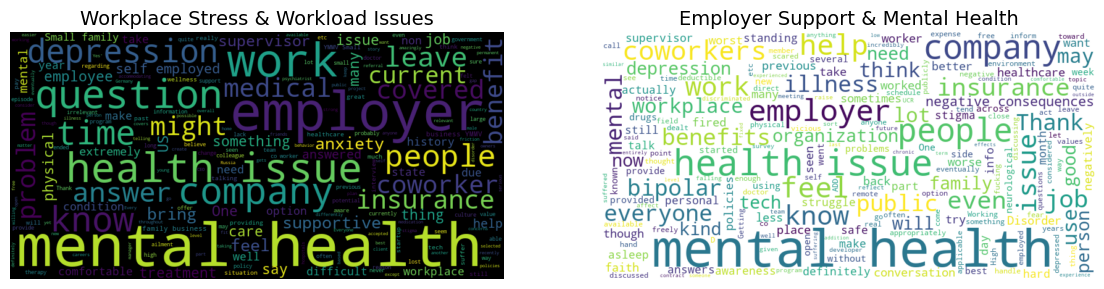

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate Word Cloud for Stress-Related Comments
stress_text = " ".join(stressed_employees["comments"])  # Combine all stress-related comments
wordcloud_stress = WordCloud(width=800, height=400, background_color="black").generate(stress_text)

# Generate Word Cloud for Employer Support Comments
support_employees = df[df["Topic_Label"] == "Employer Support & Mental Health"]
support_text = " ".join(support_employees["comments"])  # Combine all support-related comments
wordcloud_support = WordCloud(width=800, height=400, background_color="white").generate(support_text)

# Plot the Word Clouds
plt.figure(figsize=(14, 6))

# Stress-related Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_stress, interpolation="bilinear")
plt.axis("off")
plt.title("Workplace Stress & Workload Issues", fontsize=14)

# Employer Support Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_support, interpolation="bilinear")
plt.axis("off")
plt.title("Employer Support & Mental Health", fontsize=14)

plt.show()


🔴 Workplace Stress & Workload Issues (Left Cloud)

Key Observations:

+ "Mental health," "depression," "anxiety," and "stress" appear frequently, indicating serious concerns among employees.

+ "Work," "employer," "company," and "coworker" suggest that workplace culture and interactions significantly impact employees' well-being.

+ "Leave," "insurance," "medical," and "benefit" indicate that employees may be struggling with access to mental health support, medical leave, or financial assistance.

+ "Question" and "answer" suggest that employees may be seeking clarity on policies or support systems but are not getting satisfactory responses.

💡 Possible Interpretation:

+ Employees feel overburdened with workload, which is affecting their mental well-being.
+ Lack of clarity in policies and benefits might be causing additional stress.
+ Concerns about medical leave & insurance indicate potential gaps in employer-provided health benefits.

🟢 Employer Support & Mental Health (Right Cloud)
Key Observations:

+ "Mental health," "benefits," "help," and "support" appear prominently, indicating some positive aspects of workplace well-being initiatives.
 
+ "Employer," "company," "coworkers," and "organization" suggest that peer and managerial support play a crucial role in mental health awareness.

+ "Insurance," "policy," and "awareness" indicate that discussions around mental health are happening, but the effectiveness of these policies is uncertain.

+ "Bipolar," "illness," "depression," "struggle" indicate that employees are openly discussing specific mental health issues, which is a positive sign of reducing stigma.

💡 Possible Interpretation:

+ Mental health awareness programs exist, but their effectiveness may need improvement.
+ Coworkers and supervisors play a crucial role in fostering a supportive work environment.
+ Employees acknowledge employer efforts but might still require more actionable support rather than just discussions.